In [180]:
import numpy as np
import matplotlib.pyplot as plt

In [251]:
run TP1920.py


In [252]:
# Converter e definir as imagens
#resizeImageAndConvert()

In [253]:
# Ler das imagens para uma matriz 'X' e um array 'lista'
X, lista, size = readImages()
size

48

In [254]:
X[1].shape

(65025,)

In [255]:
X.shape


(48, 65025)

In [256]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 7, 0.8)
eigenvalues

Número de vectores pp a usar: 10
Número de vectores fixos a utilizar: 7


array([9.90751136e+08, 6.30218947e+08, 4.35269268e+08, 3.33622228e+08,
       2.24855371e+08, 1.54318375e+08, 1.21134636e+08, 8.78184632e+07,
       6.68677409e+07, 6.59699276e+07, 5.87781904e+07, 5.13352908e+07,
       4.47444226e+07, 4.14234117e+07, 3.58471723e+07, 3.27541222e+07,
       2.86259229e+07, 2.74066841e+07, 2.63209987e+07, 2.55560276e+07,
       2.26320736e+07, 2.19747469e+07, 1.96563079e+07, 1.84630349e+07,
       1.83906449e+07, 1.76287496e+07, 1.66528835e+07, 1.53536071e+07,
       1.51359940e+07, 1.49394378e+07, 1.37827040e+07, 1.27369162e+07,
       1.17741608e+07, 1.08065055e+07, 9.87545290e+06, 9.33015855e+06,
       8.91690709e+06, 8.32924184e+06, 8.26477620e+06, 8.05852459e+06,
       7.67418826e+06, 7.37055189e+06, 6.81845336e+06, 5.13371541e+06,
       4.90192595e+06, 4.06075207e+06, 3.90699795e+06, 1.47736266e-22])

Número de vectores pp a usar: 10
Número de vectores fixos a utilizar: 7


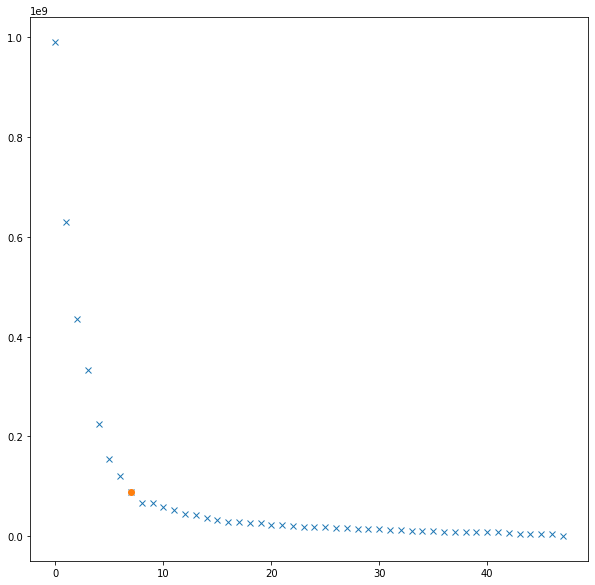

In [257]:
# Obter os vectores pp de acordo com um certo nivel de confianca
eigenvalues, eigenvectors, phi, mean, variance = pca(X, 7, 0.8)
# Alterar nome da variável
ponto=eigenvalues
# Obter o gráfico do cotovelo
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, eigenvalues, 'x')
#plt.plot(np.argmin(ponto), eigenvalues[np.argmin(ponto)], 'o')
plt.plot(7, eigenvalues[7], 'o')
plt.show()

In [258]:
eigenvectors.T[0]

array([-0.00075275, -0.00075722, -0.00077221, ...,  0.00099092,
        0.00106326,  0.00101997])

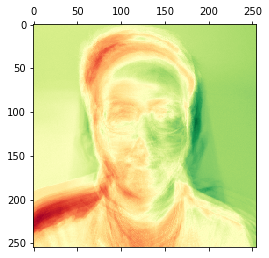

In [259]:
# Exemplo de uma eigenface do dataset
display(plt.matshow(np.reshape(eigenvectors.T[0], (255,255)), cmap=plt.cm.RdYlGn))

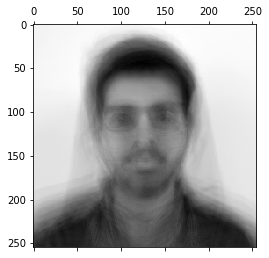

In [260]:
# Exemplo da "cara média" do dataset
display(plt.matshow(np.reshape(mean, (255,255)), cmap='gray'))

In [261]:
# Obter os coeficientes das projeccoes das eigenfaces
coef_proj = coefProj(phi, eigenvectors, X.shape[0])
coef_proj

[array([-5258.74276404, -1044.3615724 , -5495.65458882,  2269.17906941,
          643.42663394, -1800.22309362,   781.67341084]),
 array([3506.58630232,  695.13451316, -896.89471727,  248.90221791,
        4998.43806841, 3795.2533494 , 1792.87017371]),
 array([ 5908.58422775,  -950.17433121, -1960.4651097 ,  -533.92437264,
         1886.72983134,  -911.32004225,  -288.32773846]),
 array([-2722.3034706 ,   704.78247782,  -992.68590162,  3504.58171606,
         -427.27707217,  1164.3911652 , -3515.73849365]),
 array([-4941.89159567,  2074.88101764,  4930.72015154,   521.34242451,
         1532.9768695 , -1262.40915819,   448.29408878]),
 array([-4308.66350423,  1573.35731359,  4635.10989467,   802.60348554,
         1333.68524457,  -422.35545442,  -676.46457657]),
 array([-2628.25014317,  1776.43663622, -2446.76279617, -4862.23435865,
        -1327.51948635,   328.83407834,  -976.83720301]),
 array([ 8360.0039868 ,   246.03082991,   831.15168698,  1657.54642976,
        -1954.24696003, -

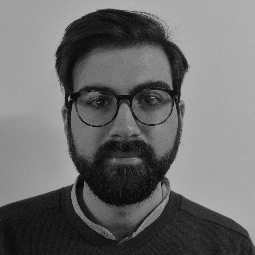

In [263]:
# Imagem para teste
input_img = Image.open('TestSet/rafa_oculos_normal.gif').convert('L')
input_img

Imagem nr.: 7
Distancia minima: 0.0322
Distancia máxima: 0.4918



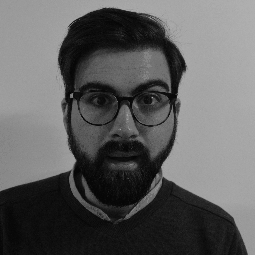

In [264]:
# Teste do reconhecimento
dist, test_coef_proj = testar(input_img, mean, eigenvectors, eigenvalues, X.shape[0], coef_proj, 'mahalanobis')
image = 0
if np.size(dist) > 0 : 
    image = lista[np.argmin(dist)]
image

In [101]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
#distance = np.sum( np.divide((coef_proj[:,4]-test_coef_proj)**2, eigenvalues[:eigenvectors.shape[1]]) )
#distance

In [199]:
def mahalanobis(x, y, eigenvalues, k):
    if x.shape[0] != y.shape[0]:
        return (-1)
    N = x.shape[1]
    distance=[0]*N
    for i in range(N):
        distance[i] = [np.sum(np.divide((x[:,i]-y)**2, eigenvalues[:k]))]
    return distance

In [350]:
coef_proj = np.reshape(coef_proj, (eigenvectors.shape[1], size))
dist = mahalanobis(coef_proj, test_coef_proj, eigenvalues, eigenvectors.shape[1])
distanceMahalanobis = np.sum(dist)
distanceMahalanobis

200.80419063685375

In [186]:
# Conclusoes: nao consegue reconhecer quando tem uma luz de lado. Caso contrario, faz bem o reconhecimento.